In [1]:
# !pip install graphviz
# !pip install pydot

In [2]:
import tensorflow.keras.layers as layers
import tensorflow as tf

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Contracting Path

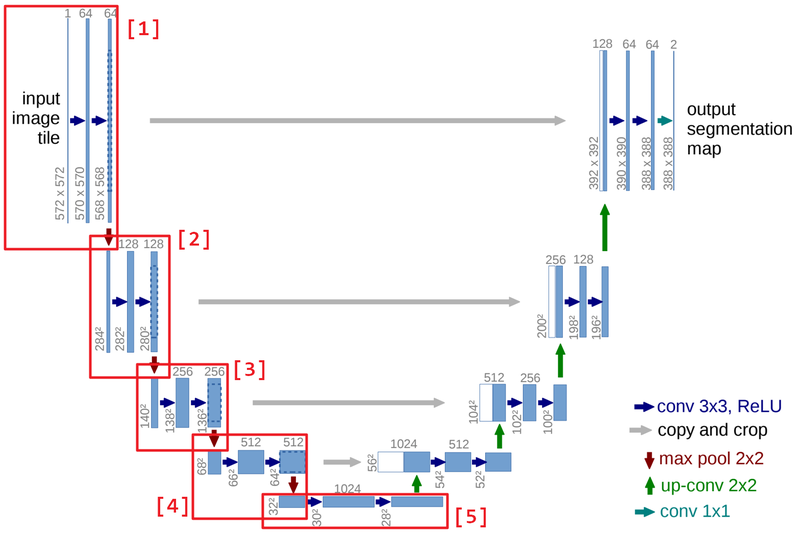

In [3]:
inputs = layers.Input(shape=(572, 572, 1))

# Contracting path 시작
# [1]
conv0 = layers.Conv2D(64, activation='relu', kernel_size = 3)(inputs)
conv1 = layers.Conv2D(64, activation='relu', kernel_size=3)(conv0)  # Skip connection으로 Expanding path로 이어질 예정
conv2 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv1)


# Q.위 이미지를 보고 [2]번 블럭을 구현해 봅시다. (filter 수를 주의하세요!)
conv3 = layers.Conv2D(128, activation='relu', kernel_size = 3)(conv2)
conv4 = layers.Conv2D(128, activation='relu', kernel_size = 3)(conv3)
conv5 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv4)


# Q.위 이미지를 보고 [3]번 블럭을 구현해 봅시다. (filter 수를 주의하세요!)
conv6 = layers.Conv2D(256, activation='relu', kernel_size = 3)(conv5)
conv7 = layers.Conv2D(256, activation='relu', kernel_size = 3)(conv6)
conv8 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv7)


# [4]
conv9 = layers.Conv2D(512, activation='relu', kernel_size = 3)(conv8)   # 66 x 66 x 512
conv10 = layers.Conv2D(512, activation='relu', kernel_size = 3)(conv9)  # 64 x 64 x 512
conv11 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv10)     # 32 x 32 x 512


# [5]
conv12 = layers.Conv2D(1024, activation='relu', kernel_size=3)(conv11)  # 30 x 30 x 1024
conv13 = layers.Conv2D(1024, activation='relu', kernel_size=3)(conv12)  # 28 x 28 x 1024
# Contracting path 끝

# Expanding path 시작
# [6]
trans01 = layers.Conv2DTranspose(512, kernel_size=2, strides=(2, 2), activation='relu')(conv13)  # 56 x 56 x 512  
crop01 = layers.Cropping2D(cropping=(4, 4))(conv10)                     # 56 x 56 x 512
concat01 = layers.concatenate([trans01, crop01], axis=-1)               # 56 x 56 x 1024

# [7]
conv14 = layers.Conv2D(512, activation='relu', kernel_size=3)(concat01)
conv15 = layers.Conv2D(512, activation='relu', kernel_size=3)(conv14)
trans02 = layers.Conv2DTranspose(256, kernel_size=2, strides=(2, 2), activation='relu')(conv15)

# [8]
crop02 = layers.Cropping2D(cropping=(16, 16))(conv7)
concat02 = layers.concatenate([trans02, crop02], axis=-1)


# Q.위 이미지를 보고 [9]번 블럭을 구현해 봅시다. (filter 수를 주의하세요!)
conv16 = layers.Conv2D(256, activation='relu', kernel_size=3)(concat02)
conv17 = layers.Conv2D(256, activation='relu', kernel_size=3)(conv16)
trans03 = layers.Conv2DTranspose(128, kernel_size=2, strides=(2, 2), activation='relu')(conv17)


# Q.위 이미지를 보고 [10]번 블럭을 구현해 봅시다. (cropping=(40, 40))
crop03 = layers.Cropping2D(cropping=(40, 40))(conv4)
concat03 = layers.concatenate([trans03, crop03], axis=-1)


# Q.위 이미지를 보고 [11]번 블럭을 구현해 봅시다. (filter 수를 주의하세요!)
conv18 = layers.Conv2D(128, activation='relu', kernel_size=3)(concat03)
conv19 = layers.Conv2D(128, activation='relu', kernel_size=3)(conv18)
trans04 = layers.Conv2DTranspose(64, kernel_size=2, strides=(2, 2), activation='relu')(conv19)


# Q.위 이미지를 보고 [12]번 블럭을 구현해 봅시다. (cropping=(88, 88))
crop04 = layers.Cropping2D(cropping=(88, 88))(conv1)
concat04 = layers.concatenate([trans04, crop04], axis=-1)


# [13]
conv20 = layers.Conv2D(64, activation='relu', kernel_size=3)(concat04)
conv21 = layers.Conv2D(64, activation='relu', kernel_size=3)(conv20)
# Expanding path 끝

outputs = layers.Conv2D(2, kernel_size=1)(conv21)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="u-netmodel")

2024-03-14 16:26:46.017322: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2024-03-14 16:26:46.017347: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2024-03-14 16:26:46.017353: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2024-03-14 16:26:46.017383: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-14 16:26:46.017398: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model.summary()

Model: "u-netmodel"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 572, 572, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 570, 570, 64)         640       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 568, 568, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 284, 284, 64)         0         ['conv2d_1[0][0]']            
 D)                                                                                      

In [5]:
# %pip install keras

In [7]:
import keras
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot  

%matplotlib inline

SVG(model_to_dot(model, show_shapes= True, show_layer_names=True, dpi=80).create(prog='dot', format='svg'))  #dpi를 작게 하면 그래프가 커집니다.

ModuleNotFoundError: No module named 'keras.utils.vis_utils'

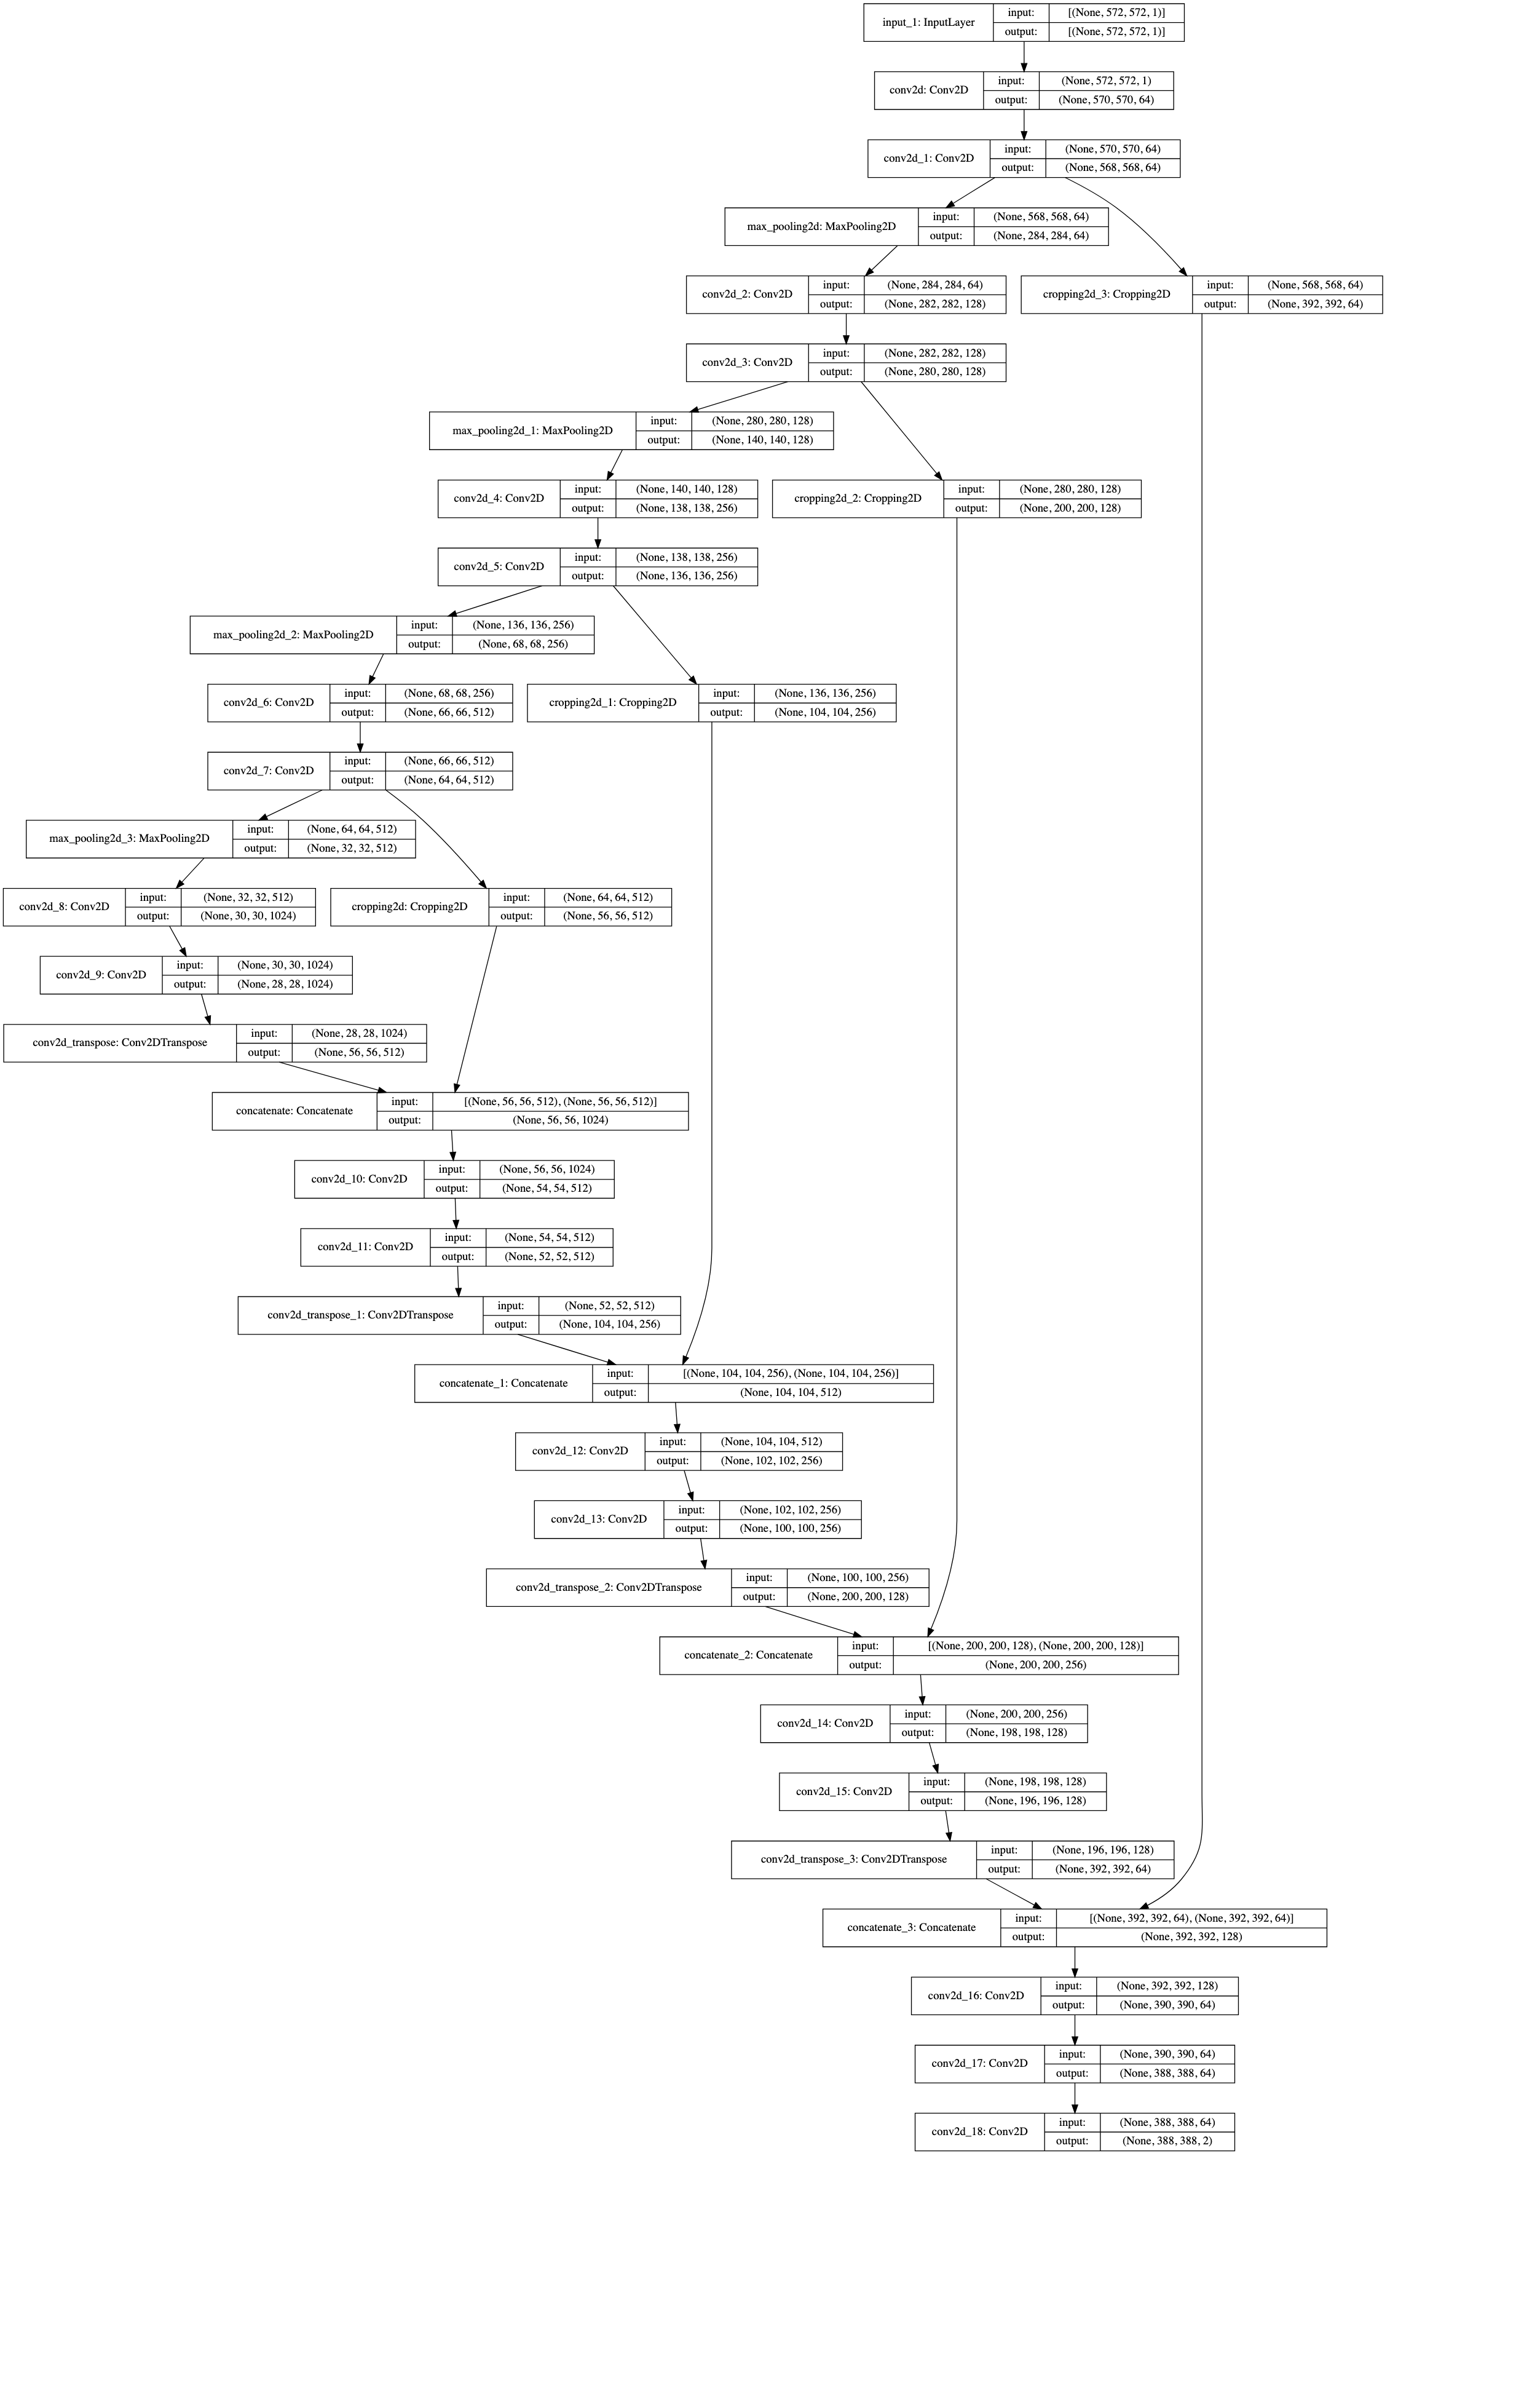

## Expanding Path

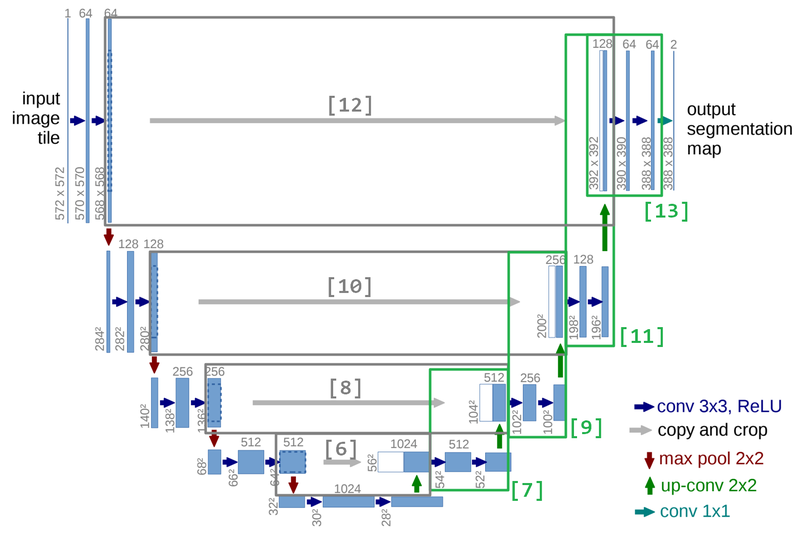